In [4]:
#НАЙТИ СВОЮ ФУНКЦИЮ

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
%matplotlib inline

def error(y_true, y_pred):
    return [(el - el1) for el, el1 in zip(y_true, y_pred)]

def error_(y_true, y_pred, h):
    return np.sqrt(np.sum([np.power(el, 2) for el in error(y_true, y_pred)]) * h)


def get_X(x0, h):
    N = int(1/h)
    return [(x0 + i*h) for i in range(N)]


def runge_cutta_4(func, h, x0, y0):
    N = int(1/h)

    Y = [0 for i in range(N)]
    X = get_X(x0, h)
    k1 = [0 for i in range(N)]
    k2 = [0 for i in range(N)]
    k3 = [0 for i in range(N)]
    k4 = [0 for i in range(N)]

    for i in range(N):
        if (i == 0):
            Y[i] = y0
        else:
            Y[i] = Y[i-1] + (h/6) * (k1[i-1] + 2 * k2[i-1] + 2 * k3[i-1] + k4[i-1])

        k1[i] = func(X[i], Y[i])
        k2[i] = func(X[i] + h / 2, Y[i] + (h / 2) * k1[i])
        k3[i] = func(X[i] + h / 2, Y[i] + (h / 2) * k2[i])
        k4[i] = func(X[i] + h, Y[i] + h * k3[i])

    return Y

#інтерполяційний метод Адамса 4-го порядку
def adams_4(func, h, x0, y0):
    N = int(1/h)

    Y_add = runge_cutta_4(func, h, x0, y0)
    X = get_X(x0, h)
    Y = [0 for i in range(N)]
    func_meanings = [func(el, el1) for el, el1 in zip(X, Y_add)]

    for i in range(N):
        if (i == 0):
            Y[i] = y0
        else:
            Y[i] = Y[i-1] + (h/24) * (9 * func_meanings[i]
            + 19 * func_meanings[i-1] - 5 * func_meanings[i-2] + func_meanings[i-3])
    return Y


#x0 = 1, y0 = 1
#func = lambda x, y: -1 / (y*pow((1-pow(x, 2))/(1-pow(y, 2)), 0.5))
#y_real = lambda x: pow(4*math.asinh(pow(pow(x-1, 0.5)/pow(2, 0.5), 2)) + 1, 0.5)

func = lambda x, y: (3*y - x - 4) / (3*x + 3)
y_real = lambda x: 1 - (x+1)*math.log(math.fabs(x+1)) / 3


X = get_X(0, 0.1)
answers = [y_real(i) for i in X]

H = np.linspace(0.001, 0.1, 10)
predictions_runge_cutta = [runge_cutta_4(func, h, 0, 1) for h in H]
errors_runge_cutta = error(answers, runge_cutta_4(func, 0.1, 0, 1))
errors_runge_cutta_h = [error_([y_real(i) for i in get_X(0, h)],
                               predictions_runge_cutta[i], h) for i, h in enumerate(H)]



predictions_adams = [adams_4(func, h, 0, 1) for h in H]
errors_adams = error(answers, adams_4(func, 0.1, 0, 1))
errors_adams_h = [error_([y_real(i) for i in get_X(0, h)],
                               predictions_adams[i], h) for i, h in enumerate(H)]


frame = pd.DataFrame(columns=['Y_real', 'Runge_Cutt', 'Adams', 'Errors_Runge_Cutta', 'Errors_Adams'])
frame['Y_real'] = pd.Series(answers)
frame['Runge_Cutt'] = pd.Series(runge_cutta_4(func, 0.1, 0, 1))
frame['Adams'] = pd.Series(adams_4(func, 0.1, 0, 1))
frame['Errors_Runge_Cutta'] = pd.Series(errors_runge_cutta)
frame['Errors_Adams'] = pd.Series(errors_adams)
frame.to_csv('results.csv', index = False)

frame



,Y_real,Runge_Cutt,Adams,Errors_Runge_Cutta,Errors_Adams
0,1.000000,1.000000,1.000000,0.000000e+00,0.000000
1,0.965053,0.965053,0.969116,-9.050509e-08,-0.004063
2,0.927071,0.927072,0.930097,-1.616760e-07,-0.003026
3,0.886309,0.886309,0.889335,-2.202691e-07,-0.003026
4,0.842980,0.842980,0.846006,-2.703955e-07,-0.003026
5,0.797267,0.797268,0.800294,-3.146545e-07,-0.003027
6,0.749331,0.749332,0.752358,-3.547439e-07,-0.003027
7,0.699311,0.699311,0.702338,-3.918047e-07,-0.003027
8,0.647328,0.647328,0.650355,-4.266229e-07,-0.003027
9,0.593493,0.593493,0.596520,-4.597519e-07,-0.003027


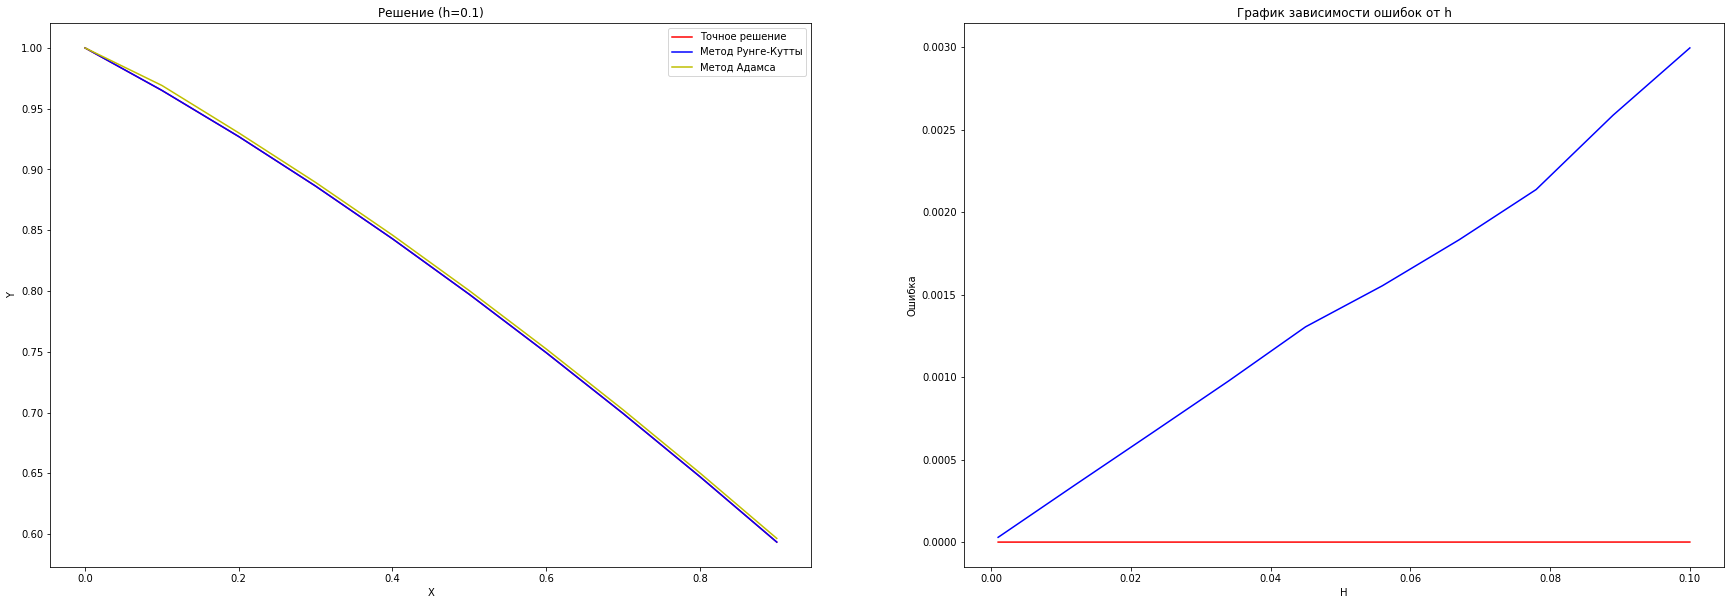

In [5]:
#frame.to_csv('results.csv', index = False)
titles = ['Решение (h=0.1)', 'График зависимости ошибок от h']
values_to_plot = [(X, answers, runge_cutta_4(func, 0.1, 0, 1), adams_4(func, 0.1, 0, 1)), 
                  (H, errors_runge_cutta_h, errors_adams_h)]
colors = ['red', 'green', 'blue', 'cyan', 'orange']

fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
for i in range(2):
    if (i == 0):
        X, answers, runge_cutt, adams = values_to_plot[i]
        axs[i].plot(X, answers, 'r', X, runge_cutt, 'b', X, adams, 'y')
        axs[i].legend(['Точное решение', 'Метод Рунге-Кутты', 'Метод Адамса'])
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Y')
    else:
        H, errors_runge_cutt, errors_adams = values_to_plot[i]
        axs[i].plot(H, errors_runge_cutt, 'r', H, errors_adams, 'b')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('H')
        axs[i].set_ylabel('Ошибка')
